<a href="https://colab.research.google.com/github/xumeiying/XMY/blob/master/Stats_II_Probset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 1 GOV 391L, Spring 2020

In [0]:
# load packages
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
from matplotlib import rc
import seaborn as sns

## Q1
Below is a toy data set of three variables measured in ten U.S. states: births per 1,000 people, per capita income in thousands of dollars (U.S.), and the percent of the population that identifies as religious.

| State      | Births | Income  | Religious |
| -----------|:------:| -------:| ---------: |
| Arizona    |12.5    | 25.7 | 73 |
|Arkansas    |13.1    |22.9|82|
|Connecticut |10      |39.4|77|
|Delaware    |11.8    |30.5|77|
|Florida     |11.1|26.6|70|
|Indiana     |12.7|25.1|74|
|Louisiana   |13.9|24.8|87|
|Montana     |12.2|26|70|
|North Dakota|14.9|33.1|80|
|Virginia    |12.3|34.1|80|

All parameters for this question should be calculated using the summation formulas we went over in the second lecture. R can only be used for arithmetic (i.e. the `sum`, `mean`, and `sqrt` functions are fine, `var`, `cov`, and `lm` are not.)

- (a) Write the model you would use to estimate the regression of birth rate on income and religiosity.
- (b) Calculate the values of $b_{0}$, $b_{1}$, and $b_{2}$ using OLS.
- (c) Describe, in substantive terms, what $b_{0}$, $b_{1}$, and $b_{2}$ say about the relationship between
birth rate, income and religiosity.
- (d) If income were measured in dollars instead of thousands of dollars, would your coefficient estimates from part (a) change? If so, how?
- (e) Calculate the residuals for the ten states. Based on these residuals, do you see any patterns that suggest another explanatory factor might be added to this model?
- (f) What is the sum of the residuals?
- (g) Estimate the standard error for the covariate on income. (The $R^{2}$ from regressing income on religiosity is 0.0003765.)
- (h) Estimate the standard error for the covariate on income if $n = 50$ but the summations remain the same (unlikely, but humor me.)

### (a)(b)(c)
The model shows that 
- the average birth rate in the 11 states is 2.7465 births per 1000 people when per capita income is zero and there are no religious people  
- every 1000 dollar increase of per capita income is associated with 0.0176 less birth per 1,000 people
- every 1 percent increase of religious people is associated with 0.1324 more birth per 1,000 people





In [0]:
# build dataset
from pandas import DataFrame
dataseta = {"State": ["Arizona", "Arkansas", "Connecticut", "Delaware", "Florida","Indiana", "Louisiana","Montana","North Dakota","Virginia"],
            "Birth":[12.5, 13.1, 10, 11.8, 11.1, 12.7, 13.9, 12.2, 14.9, 12.3],
            "Income": [25.7, 22.9, 29.4, 30.5,26.6, 25.1, 24.8, 26, 33.1, 34.1],
            "Religious":[73, 82, 77,77,70, 74,87, 70, 80,80]}
dfa = DataFrame(dataseta, columns=["State", "Birth", "Income", "Religious"])
print(dfa)

          State  Birth  Income  Religious
0       Arizona   12.5    25.7         73
1      Arkansas   13.1    22.9         82
2   Connecticut   10.0    29.4         77
3      Delaware   11.8    30.5         77
4       Florida   11.1    26.6         70
5       Indiana   12.7    25.1         74
6     Louisiana   13.9    24.8         87
7       Montana   12.2    26.0         70
8  North Dakota   14.9    33.1         80
9      Virginia   12.3    34.1         80


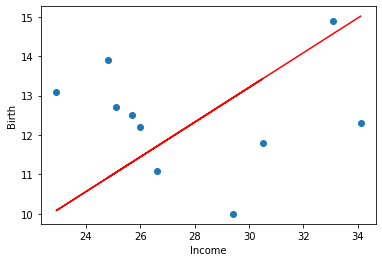

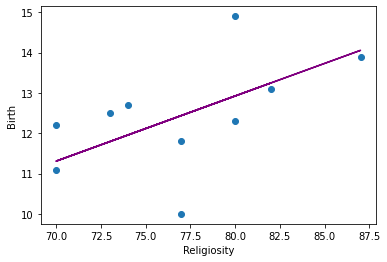

In [0]:
# plot 
X1 = dfa[["Income"]].values
Y = dfa["Birth"]
model1 = sm.OLS(Y, X1).fit() 
Y1_hat = model1.predict()
plt.scatter(X1, Y)
plt.plot(X1, Y1_hat, color='red')
plt.xlabel("Income")
plt.ylabel("Birth")
plt.show()

X2 = dfa[["Religious"]].values
model1 = sm.OLS(Y, X2).fit() 
Y2_hat = model1.predict()
plt.scatter(X2, Y)
plt.plot(X2, Y2_hat, color='Purple')
plt.xlabel("Religiosity")
plt.ylabel("Birth")
plt.show()

In [0]:
# construct model
Y = dfa["Birth"]
X = dfa[["Income", "Religious"]].values
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Birth   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.313
Date:                Fri, 20 Mar 2020   Prob (F-statistic):              0.328
Time:                        21:16:07   Log-Likelihood:                -15.227
No. Observations:                  10   AIC:                             36.45
Df Residuals:                       7   BIC:                             37.36
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7465      6.822      0.403      0.699     -13.386      18.879
x1            -0.0176      0.118     -0.149      0.886      -0.297       0.262
x2             0.1324      0.082      1.621      0.149      -0.061       0.326
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                0.360
Skew:                          -0.299   Prob(JB):                        0.835
Kurtosis:                       3.712   Cond. No.                     1.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###(d)
If income were measured in dollars instead of thousands of dollars, then 1 dollar increase in per capita income is associated with -1.761e-05 less birth per 1,000 people.

In [0]:
# If income were measured in dollars instead of thousands of dollars, would your coefficient estimates from part (a) change?
Income_in_dollars = np.array([25.7, 22.9, 29.4, 30.5,26.6, 25.1, 24.8, 26, 33.1, 34.1])*1000
dfa.insert(3, "Income_in_dollars", Income_in_dollars, True)
dfa

,State,Birth,Income,Income_in_dollars,Religious
0,Arizona,12.5,25.7,25700.0,73
1,Arkansas,13.1,22.9,22900.0,82
2,Connecticut,10.0,29.4,29400.0,77
3,Delaware,11.8,30.5,30500.0,77
4,Florida,11.1,26.6,26600.0,70
5,Indiana,12.7,25.1,25100.0,74
6,Louisiana,13.9,24.8,24800.0,87
7,Montana,12.2,26.0,26000.0,70
8,North Dakota,14.9,33.1,33100.0,80
9,Virginia,12.3,34.1,34100.0,80


In [0]:
Y = dfa["Birth"]
X2 = dfa[["Income_in_dollars", "Religious"]].values
X2 = sm.add_constant(X2) # adding a constant
model2 = sm.OLS(Y, X2).fit()
predictions = model2.predict(X) 
model2.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Birth   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.313
Date:                Fri, 20 Mar 2020   Prob (F-statistic):              0.328
Time:                        21:16:07   Log-Likelihood:                -15.227
No. Observations:                  10   AIC:                             36.45
Df Residuals:                       7   BIC:                             37.36
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7465      6.822      0.403      0.699     -13.386      18.879
x1         -1.761e-05      0.000     -0.149      0.886      -0.000       0.000
x2             0.1324      0.082      1.621      0.149      -0.061       0.326
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                0.360
Skew:                          -0.299   Prob(JB):                        0.835
Kurtosis:                       3.712   Cond. No.                     4.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (e)(f)
By calculating the predicted value of Birth rate and the residuals, it seems that our model tends to systemetically underpredict the birth rates of [US Southern States](https://en.wikipedia.org/wiki/Southern_United_States). Therefore, it is necessary to introduce a new dummy variable, `if_south`, to account for the variations. 

The sum of squared residuals $SS_{r}$ is equal to $12.591944587847197$.

In [0]:
# calculate residuals
Y = dfa["Birth"]
X = dfa[["Income", "Religious"]].values
model = sm.OLS(Y, X).fit()
Y_hat = model.predict()
residuals = Y - Y_hat
dfa.insert(2, "Birth_predicted", Y_hat, True)
dfa.insert(3, "residuals", residuals, True)
dfa

,State,Birth,Birth_predicted,residuals,Income,Income_in_dollars,Religious
0,Arizona,12.5,11.792680,0.707320,25.7,25700.0,73
1,Arkansas,13.1,13.240110,-0.140110,22.9,22900.0,82
2,Connecticut,10.0,12.441336,-2.441336,29.4,29400.0,77
3,Delaware,11.8,12.442527,-0.642527,30.5,30500.0,77
4,Florida,11.1,11.310168,-0.210168,26.6,26600.0,70
5,Indiana,12.7,11.953193,0.746807,25.1,25100.0,74
6,Louisiana,13.9,14.047979,-0.147979,24.8,24800.0,87
7,Montana,12.2,11.309518,0.890482,26.0,26000.0,70
8,North Dakota,14.9,12.928830,1.971170,33.1,33100.0,80
9,Virginia,12.3,12.929912,-0.629912,34.1,34100.0,80


In [0]:
ssr = np.sum(residuals**2)
print(ssr)

12.591944587847197


### (g)(h)
We will calculate the two standar errors by hand with the formula 
$ s.e.(b_{j})= \frac{{\sum(y_{i}-\hat y)}}{\sqrt{\sum(x_{ij}-\bar x_{j})^2 (1-R_{j}^2)(n-k)}}$.


In [0]:
Y = dfa["Birth"]
X = dfa[["Income", "Religious"]].values
model = sm.OLS(Y, X).fit()
Y_hat = model.predict()
x1 = dfa[["Income"]].values
x1_var = np.var(x1)
y_hat_var = np.sum(Y - Y_hat)
R_squared = 0.0003765
n = 10
k = 2
print("x1_var =", x1_var)
print ("y_hat_var", y_hat_var)
print("\n ================= calculating results ================")
se_x1 = y_hat_var / (np.sqrt (x1_var) * (1-R_squared)*(n - k))
print("\n the standard error for the covariate on income is", se_x1)
print("\n ================= humoring ===========================")
se_x1_2 = y_hat_var / (np.sqrt (x1_var) * (1-R_squared)*(50 - k))
print("\n the standard error for the covariate on income when n = 50 is", se_x1_2)

x1_var = 12.701600000000003
y_hat_var 0.10374627503827583

 ================= calculating results ================

 the standard error for the covariate on income is 0.003640129651448885

 ================= humoring ===========================

 the standard error for the covariate on income when n = 50 is 0.0006066882752414808


In [0]:
se_x1 = np.sum(Y - Y_hat)/ (np.sqrt (x1_var) * (1-R_squared)*(n - k))
print(round(se_x1,6))

0.00364


## Q2
You estimate the following model on a sample of 20 observations:
$ \hat Y = b_{0} + b_{1}X_{1} + b_{2}X_{2} + b_{3}X_{3} + b_{4}X_{4} $,
and obtain the following results:

| Variable  | Coefficient | S.E. |
| ----------|:----------:| ----:|
| Constant  |0.258       |0.391 | 
|$X_{1}$    |0.023       |0.006 |
|$X_{2}$    |0.004       |0.004 |
|$X_{3}$    |0.027       |0.021 |
|$X_{4}$    |0.290       |0.165 |

- (a) Calculate the t-statistics you would use to test the hypothesis $β_{j}\neq 0 $ for each of the five estimated parameters.
- (b) For which coefficients can you reject the null hypothesis $β_{j}= 0 $ with a significance level of $α = 0.05$?
- (c) Construct 95% confidence intervals for each of the five estimated parameters.

### Solution
The hypothesis are 
$$H_{0}: \beta _{i} = 0$$
$$H_{\alpha}: \beta _{i} \neq 0$$
The t-score is calculated as follow:
$$t_{i} = \frac {b_{i}−0}{s.e. (b_{i})}$$
The critical value is calculated using the pdf function.

We found that only $\beta _{1} = 0.023  (0.0113,0.0347)$ is statistically significance at the 0.05 level. The other coefficients are not tatistically significance. 

The whole results are reported as follows
- the t-statistics for $\beta _{0} = 0.258 $ is $0.6598$ with a 95% confidence interval at $(-0.5018, 1.0178) $; we accept the null hypothesis as the coefficient is not statistically significant; 
- the t-statistics for $\beta _{1} = 0.023 $ is $3.8333$ with a 95% confidence interval at $(0.0113, 0.0347)$; we reject the null hypothesis as the coefficient is statistically significant at 0.05 level;
- the t-statistics for $\beta _{2} = 0.004 $ is $1.0$ with a 95% confidence interval at $(-0.0038, 0.0118) $; we accept the null hypothesis as the coefficient is not statistically significant; 
- the t-statistics for $\beta _{3} = 0.027 $ is $1.2857$ with a 95% confidence interval at $(-0.0138, 0.0678) $; we accept the null hypothesis as the coefficient is not statistically significant; 
- the t-statistics for $\beta _{4} = 0.290 $ is $1.7576$ with a 95% confidence interval at $(-0.0306, 0.6106) $; we accept the null hypothesis as the coefficient is not statistically significant.

In [0]:
# t-test function
from scipy.stats import t
def t_test (beta, se, N, k_q2, alpha_q1):
    t_score = beta / se
    df_q2 = n - k_q2
    cv = t.ppf(1.0 - alpha_q1, df_q2) 
    CI_start = round((beta - cv * se), 4)
    CI_end = round((beta + cv * se),4)
    if abs(t_score) <= cv:
	    print('The t-statistics is', round(t_score,4), '; we accept the null hypothesis; \n the coefficient is not statistically significant; \n its 95% confidence interval is', (CI_start, CI_end))
    else:
	    print('The t-statistics is', round(t_score,4), '; we reject the null hypothesis; \n the coefficient is statistically significant at 0.05 level; \n its 95% confidence interval is', (CI_start, CI_end))

In [0]:
# t-test results
print("t_test results of the beta_0 (0.258):")
t_test (0.258,0.391, 20, 4, 0.05)

print("\n t_test results of beta_1 (0.023):")
t_test(0.023, 0.006, 20, 4, 0.05)

print("\n t_test results of beta_2 coefficient (0.004):")
t_test(0.004, 0.004, 20, 4, 0.05)

print("\n t_test results of beta_3 coefficient (0.027):")
t_test(0.027, 0.021, 20, 4, 0.05)

print("\n t_test results of beta_4 coefficient (0.290):")
t_test(0.290, 0.165, 20, 4, 0.05)


t_test results of the beta_0 (0.258):
The t-statistics is 0.6598 ; we accept the null hypothesis; 
 the coefficient is not statistically significant; 
 its 95% confidence interval is (-0.5018, 1.0178)

 t_test results of beta_1 (0.023):
The t-statistics is 3.8333 ; we reject the null hypothesis; 
 the coefficient is statistically significant at 0.05 level; 
 its 95% confidence interval is (0.0113, 0.0347)

 t_test results of beta_2 coefficient (0.004):
The t-statistics is 1.0 ; we accept the null hypothesis; 
 the coefficient is not statistically significant; 
 its 95% confidence interval is (-0.0038, 0.0118)

 t_test results of beta_3 coefficient (0.027):
The t-statistics is 1.2857 ; we accept the null hypothesis; 
 the coefficient is not statistically significant; 
 its 95% confidence interval is (-0.0138, 0.0678)

 t_test results of beta_4 coefficient (0.290):
The t-statistics is 1.7576 ; we accept the null hypothesis; 
 the coefficient is not statistically significant; 
 its 95% co

## Q3
Given the following matrices, calculate the equations below (you can use `R` or calculate the equations by hand if you’re bored):
$ X = 
\begin{bmatrix}
1 & 4 & 2 & 0.5\\
1 & 3 & 6 & 0.8\\
1 & 9 & 0 & 1.7\\
1 & 5 & 3 & 2.4
\end{bmatrix}
$ , and 
$Y= 
\begin{bmatrix}
1\\
4\\
3\\
2
\end{bmatrix}
$
<br/>
- (a) $X’X$
- (b) $X’Y$
- (c) $(X’X)^{-1}$

### Solution
$$X’X = 
\begin{bmatrix}
 1&4&2&0.5\\
 4&9&54&4\\
 2&54&0&5.1\\
 0.5&4&5.1&5.76
\end{bmatrix}
$$
<br/> $$X’Y = 
\begin{bmatrix}
 1&1&1&1\\
 16&12&36&20\\
 6&18&0&9\\
 1&1.6&3.4&4.8
\end{bmatrix}
$$
<br/> $$(X’X)^{-1} = 
\begin{bmatrix}
 1.39656356&-0.05158047&-0.09473938&-0.00152588\\
 -0.05158047  & 0.00365929  & 0.0231011&-0.0185178\\
 -0.09473938  &0.0231011  & 0.00400968&-0.01136876\\
 -0.00152588 & -0.0185178 & -0.01136876 & 0.19666924
\end{bmatrix}
$$



In [0]:
from numpy.linalg import inv
X_q3 = np.array ([[1, 4, 2, 0.5],
              [1, 3, 6, 0.8], 
              [1, 9, 0, 1.7], 
              [1, 5, 3, 2.4]])
Y_q3 = np.array ([[1], 
              [4], 
              [3], 
              [2]])
X_prime_X = X_q3.T * X_q3
X_prime_Y = X_q3.T * Y_q3
X_prime_X_inverse = inv(X_prime_X)
print("X_prime_X = \n", X_prime_X)
print("\n X_prime_Y = \n", X_prime_Y)
print("\n X_prime_X_inverse = \n", X_prime_X_inverse)

X_prime_X = 
 [[ 1.    4.    2.    0.5 ]
 [ 4.    9.   54.    4.  ]
 [ 2.   54.    0.    5.1 ]
 [ 0.5   4.    5.1   5.76]]

 X_prime_Y = 
 [[ 1.   1.   1.   1. ]
 [16.  12.  36.  20. ]
 [ 6.  18.   0.   9. ]
 [ 1.   1.6  3.4  4.8]]

 X_prime_X_inverse = 
 [[ 1.39656356 -0.05158047 -0.09473938 -0.00152588]
 [-0.05158047  0.00365929  0.0231011  -0.0185178 ]
 [-0.09473938  0.0231011   0.00400968 -0.01136876]
 [-0.00152588 -0.0185178  -0.01136876  0.19666924]]


## Q4
Load the `happiness1.csv` file on Canvas into `R`. All parameters for this question should be calculated using matrix algebra commands in R (as opposed to the `lm` function, although you can double check your work with `lm`.)
- (a) Create fours catterplots that plot infrastructure, unemployment, lifeexpectancy and rule of law against happiness.
- (b) Load the data into `R` and write a generalizable script using OLS in matrix algebra form that will estimate $\beta$ from: 
$$Happiness = \beta_{0} + \beta_{1}Infrastructure + \beta_{2}Unemp + \beta_{3}LifeExp + \beta_{4}Law + \varepsilon $$
    Report your estimates for $\beta$.
- (c) Calculate the fitted values of $y$. Report the first five rows of the resulting vector.
- (d) Calculate the sum of squared errors.
- (e) Calculate $\sigmaˆ{2}$.
- (f) Calculate the standard errors for each of the values of $\hat \beta$. (Hint: If you’re getting error messages when trying to calculate the variance-covariance matrix, try following your estimate for $\sigmaˆ{2}$ with $[1,1]$.)

In [217]:
# load data
happiness_dada = pd.read_csv("/content/drive/My Drive/Colab Notebooks/happiness1.csv")
happiness_dada

,country,happiness,infrastructure,unemployment,life_expectancy,rule_of_law
0,Albania,4.813763,3.797320,17.490,77.998390,-0.337862
1,Algeria,6.354898,3.589957,10.600,75.635025,-0.773168
2,Angola,3.794838,2.249658,6.804,60.806732,-1.118136
3,Azerbaijan,5.251530,4.805580,4.910,71.724754,-0.672239
4,Argentina,6.671114,3.002204,7.268,76.134003,-0.886035
...,...,...,...,...,...,...
137,Burkina Faso,3.481348,2.369452,3.269,59.375294,-0.547253
138,Uruguay,6.561444,3.989287,6.460,76.982094,0.710575
139,Venezuela,6.136096,2.598213,6.954,74.226143,-1.916324
140,Yemen,3.967958,2.457196,17.483,64.507172,-1.200265


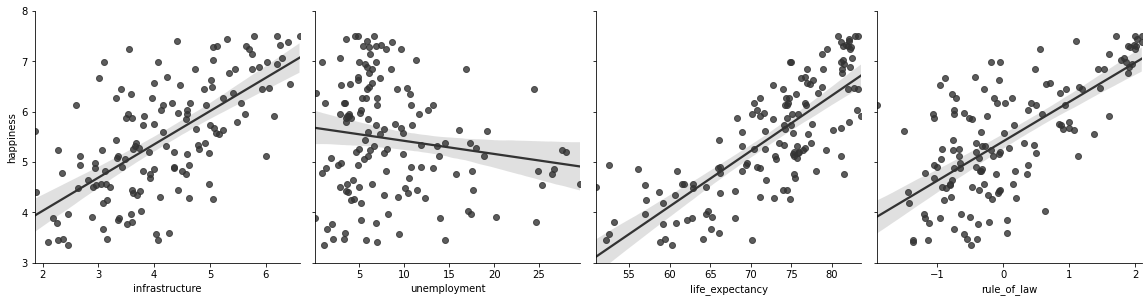

In [0]:
# plot data
# sns.lmplot(x="infrastructure", y="happiness", 
#            data = happiness_dada, fit_reg=True)
# sns.lmplot(x="unemployment", y="happiness", 
#            data = happiness_dada, fit_reg=True)
# sns.lmplot(x="life_expectancy", y="happiness",
#             data=happiness_dada,fit_reg=True)
# sns.lmplot(x="rule_of_law", y="happiness",
#             data=happiness_dada,fit_reg=True)

# sns.pairplot(happiness_dada, vars=["happiness",'infrastructure','unemployment', 'life_expectancy','rule_of_law'])

g = sns.PairGrid(happiness_dada, y_vars=["happiness"], x_vars=["infrastructure", "unemployment","life_expectancy", "rule_of_law"], height=4)
g.map(sns.regplot, color="0.2")
g.set(ylim=(3, 8))

### Solution
Regression in matrix form:
- Coefficients: $\hat \beta = ( X ′ X )^{-1} (X ′ Y)$;
- Predicted value: $\hat Y = XB $;
- Residual: $e = Y - \hat Y $
- SSE: $e'e$
- Variance of coefficients: $var(\hat \beta) = \sigma^{2}(X'X)^{-1}; \sigma^{2} = \frac{e'e}{n-k-1}$

The estimated coefficients are: $ \beta_{0} = -0.5872; \beta_{1}0.0684; \beta_{2} = -0.0230; \beta_{3}=0.0824; \beta_{4}=0.2511$.

The predicted level of happiness for Albania, Algeria, Angola, Azerbaijan, and Argintina are 5.6121, 5.4522, 4.1394, 5.3692, and 5.5013 respectivelly. 

The sum of squared errors is 63.0263. 

The standard errors for $ \beta_{0}, \beta_{1}, \beta_{2}, \beta_{3}, and \beta_{4}$ are $0.5184, 0.009, 0.0001, 0.0001, and 0.0118 $ respecfully.


| coefficient | value         | s.e.  |
|--------------|:-------------:| ----:|
|$ \beta_{0}$  | -0.5872      |0.5184 |
|$\beta_{1}$   |0.0684        |0.009  |
|$\beta_{2}$   | -0.0230      |0.0001 |
|$ \beta_{3}$  | 0.0824       |0.0001 |
|$ \beta_{4}$  |0.2511        |0.0118 |



In [216]:
# convert dataset into X and Y matrices
Y_q4 = happiness_dada["happiness"].values.reshape(142, 1)
X_without_intercept = happiness_dada[["infrastructure","unemployment","life_expectancy","rule_of_law"]].values

# intercept matrix: create a new 142 *1 matrix with identical elements as 1 
intercept = np.full((142, 1), 1) 

# concatenate X and intercept matrices
X_q4 = np.concatenate((intercept, X_without_intercept),axis=1)

# estimate coefficients;  
beta_q4 = np.dot(inv(np.dot(X_q4.T, X_q4)), np.dot(X_q4.T, Y_q4)) # noting that we use np.dot() instead of np.multiple() to achieve matrix multiplication 
print ("coefficients \n", beta_q4)

# estimate fitted value
Y_pred_q4 = np.dot(X_q4, beta_q4)
print("\n  fitted values of happiness \n", Y_pred_q4[:5]) # show only the first five values

# estimate sum of squared errors
redisual_q4 = Y_q4 - Y_pred_q4
SSE_q4 = np.dot(redisual_q4.T, redisual_q4)
print("\n sum of squared errors is \n", SSE_q4)

# estimate variance of coefficients
var_residuals_q4 = SSE_q4 / (142 - 4 - 1) # degrees of freedom: N = 142 (observations); k = 4 (variables)
var_beta_q4 = var_residuals_q4 * inv(np.dot(X_q4.T, X_q4))
print("\n variance-covariance matrix of coefficients \n ", var_beta_q4)
## The diagonal of the variance-covariance matrix represents the variance for each estimate of beta
## pay attention to the zero indexing feature in array
print("\n standard errors are (round up in four decimals) \n", round(var_beta_q4[0,0],4), "\n", round(var_beta_q4[1,1],4), "\n", round(var_beta_q4[2,2],4), "\n", round(var_beta_q4[3,3],4), "\n", round(var_beta_q4[4,4],4)) 

coefficients 
 [[-0.58715021]
 [ 0.06837396]
 [-0.0229775 ]
 [ 0.08239014]
 [ 0.25110699]]

  fitted values of happiness 
 [[5.61206954]
 [5.45217997]
 [4.13943197]
 [5.36921503]
 [5.50132322]]

 sume of squared errors is 
 [[63.02633969]]

 variance-covariance matrix of coefficients 
  [[ 5.18440908e-01 -1.74605151e-02 -8.00509856e-04 -6.07944529e-03
   5.04755030e-02]
 [-1.74605151e-02  9.01150396e-03  2.52191691e-05 -2.74842695e-04
  -7.05566192e-03]
 [-8.00509856e-04  2.52191691e-05  7.87694326e-05  1.84807884e-07
  -1.68825485e-05]
 [-6.07944529e-03 -2.74842695e-04  1.84807884e-07  1.00337541e-04
  -3.00289541e-04]
 [ 5.04755030e-02 -7.05566192e-03 -1.68825485e-05 -3.00289541e-04
   1.17539804e-02]]

 standard errors are (round up in four decimals) 
 0.5184 
 0.009 
 0.0001 
 0.0001 
 0.0118


## Q5
Load the `“saving.csv”` file on Canvas into `R` and create the matrices you need to regress savings on income, family size, education and age using OLS. (You can use the code snippet above again, but pay attention to which variables are in which columns.)
- (a) Using your script from problem 4, estimate $\hat \beta$ from a regression of savings on income, family size, education and age.
- (b) Describe your results in substantive terms.
- (c) Calculate the sum of squared residuals.
- (d) Calculate the standard errors for each of the values of $\hat \beta$.
- (e) Test the hypothesis that there is a relationship between income and savings.

In [218]:
# load data
savings_dada = pd.read_csv("//content/drive/My Drive/Colab Notebooks/saving.csv")
savings_dada

,savings,income,family size,education,age,consumption
0,30,1920,4,2,40,1890
1,874,12403,4,9,33,11529
2,370,6396,2,17,31,6026
3,1200,7005,3,9,50,5805
4,275,6990,4,12,28,6715
...,...,...,...,...,...,...
95,1800,32080,2,16,54,30280
96,1684,9260,5,12,31,7576
97,1475,10450,2,18,27,8975
98,566,9138,5,12,40,8572


### solution

| coefficient   | variable    | value           | s.e.                 |
|--------------|:-----------:| ---------------:| --------------------:|
|$ \beta_{0}$  |intercept    |1.36788003e-09   |2.072723221696566e-20 |
|$\beta_{1}$   |income       |1.00000000e+00   |3.6120191810691507e-29|
|$\beta_{2}$   |family size  |-7.11679604e-11  |1.3266502445998057e-22|
|$ \beta_{3}$  |education    |-3.13775672e-11  |3.5817982977544354e-23|
|$ \beta_{4}$  |age          |-1.93267624e-11  |6.658955756002866e-24|
|$ \beta_{5}$  |consumption  |-1.00000000e+00  |2.833868277135947e-29|

 
The sum of squared errors is 2.61449795e-18

The t-statistics is for the coefficient on income 1.8929567251013723e+27, which is statistically significant at 0.05 level; therefore we reject the null hypothesis.

In [241]:
# convert dataset into X and Y matrices
Y_q5 = savings_dada["savings"].values.reshape(100, 1)
X_q5_without_intercept = savings_dada[["income","family size","education","age", "consumption"]].values

# intercept matrix: create a new 100 *1 matrix with identical elements as 1 
intercept_q5 = np.full((100, 1), 1) 

# concatenate X and intercept matrices
X_q5 = np.concatenate((intercept_q5, X_q5_without_intercept),axis=1)

# estimate coefficients;  
beta_q5 = np.dot(inv(np.dot(X_q5.T, X_q5)), np.dot(X_q5.T, Y_q5)) # noting that we use np.dot() instead of np.multiple() to achieve matrix multiplication 
print ("coefficients \n", beta_q5)

# estimate fitted value
Y_pred_q5 = np.dot(X_q5, beta_q5)

# estimate sum of squared errors
redisual_q5 = Y_q5 - Y_pred_q5
SSE_q5 = np.dot(redisual_q5.T, redisual_q5)
print("\n sum of squared errors is \n", SSE_q5)

# estimate variance of coefficients
var_residuals_q5 = SSE_q5 / (100 - 5 - 1) # degrees of freedom: N = 100 (observations); k = 5 (variables)
var_beta_q5 = var_residuals_q5 * inv(np.dot(X_q5.T, X_q5))
print("\n variance-covariance matrix of coefficients \n ", var_beta_q5)
# The diagonal of the variance-covariance matrix represents the variance for each estimate of beta
# pay attention to the zero indexing feature in array
print("\n standard errors are  \n", var_beta_q5[0,0], 
      "\n", var_beta_q5[1,1], 
      "\n", var_beta_q5[2,2], 
      "\n", var_beta_q5[3,3], 
      "\n", var_beta_q5[4,4],
      "\n", var_beta_q5[5,5]) 

# test the hypothesis that there is a relationship between income and savings
print("\n t_test results of the beta_1 (0.06837396):")
t_test (0.06837396, 3.6120191810691507e-29, 100, 5, 0.05)

coefficients 
 [[ 1.36788003e-09]
 [ 1.00000000e+00]
 [-7.11679604e-11]
 [-3.13775672e-11]
 [-1.93267624e-11]
 [-1.00000000e+00]]

 sum of squared errors is 
 [[2.61449795e-18]]

 variance-covariance matrix of coefficients 
  [[ 2.07272322e-20  1.74579462e-25 -8.28092688e-22 -5.27604692e-22
  -3.13151295e-22 -3.97057023e-26]
 [ 1.74579462e-25  3.61201918e-29 -3.03150779e-28 -1.54086532e-26
  -3.68216484e-27 -2.52610764e-29]
 [-8.28092688e-22 -3.03150779e-28  1.32665024e-22  1.67517523e-24
   5.65318473e-24  1.84729321e-27]
 [-5.27604692e-22 -1.54086532e-26  1.67517523e-24  3.58179830e-23
   5.80201489e-24  4.04157553e-27]
 [-3.13151295e-22 -3.68216484e-27  5.65318473e-24  5.80201489e-24
   6.65895576e-24 -2.27093641e-29]
 [-3.97057023e-26 -2.52610764e-29  1.84729321e-27  4.04157553e-27
  -2.27093641e-29  2.83386828e-29]]

 standard errors are  
 2.072723221696566e-20 
 3.6120191810691507e-29 
 1.3266502445998057e-22 
 3.5817982977544354e-23 
 6.658955756002866e-24 
 2.833868277135947e-